In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
iris=sns.load_dataset('iris')

In [11]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

## EDA

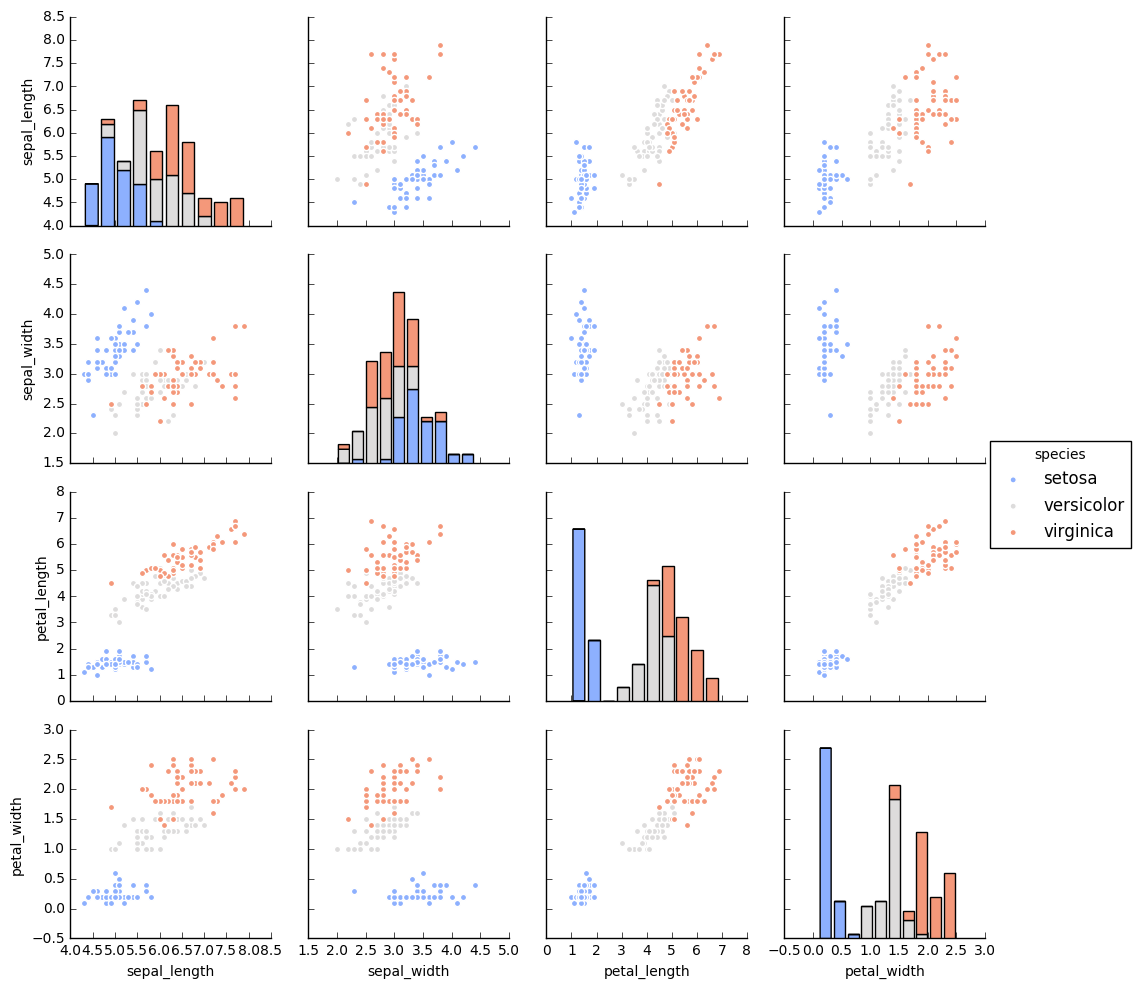

In [26]:
plt.figure(figsize=(10,7))
sns.pairplot(iris,hue='species',palette='coolwarm')
plt.show()

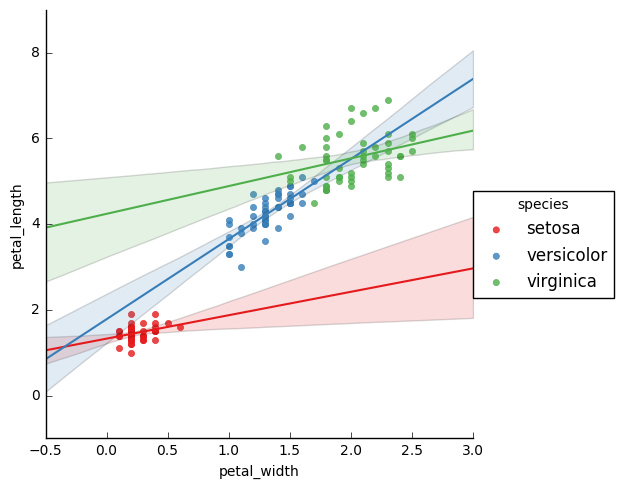

In [103]:
sns.lmplot(x='petal_width',y='petal_length',data=iris,hue='species',palette='Set1')

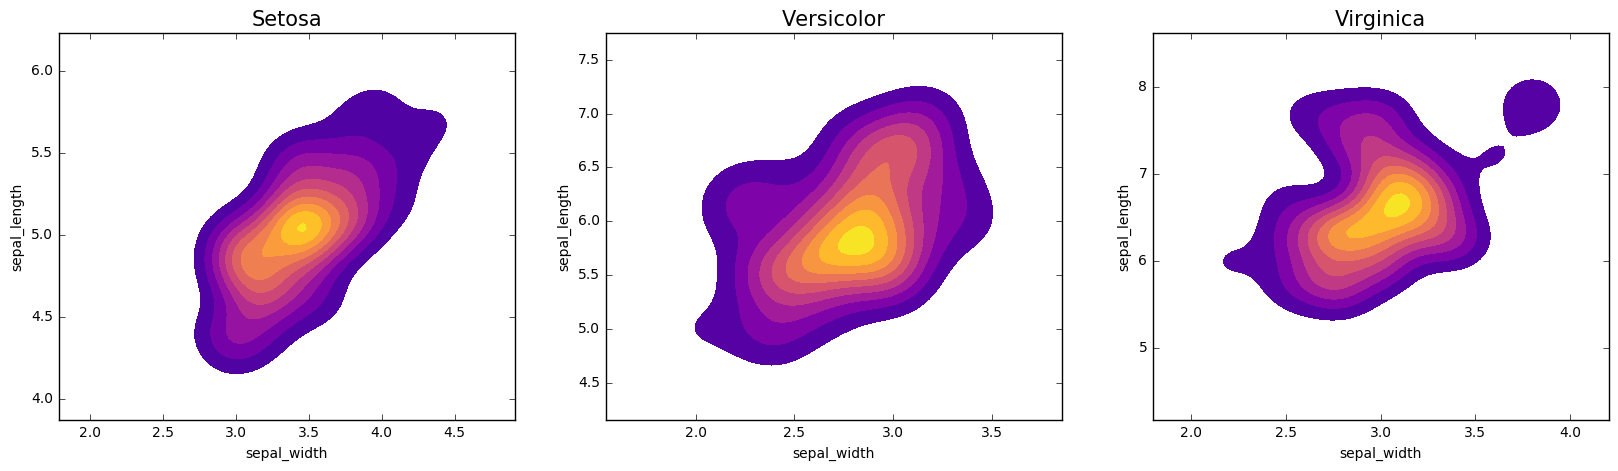

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
setosa=iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma',shade=True,shade_lowest=False)
plt.title('Setosa',size=15)
plt.subplot(1,3,2)
ver=iris[iris['species']=='versicolor']
sns.kdeplot(ver['sepal_width'],ver['sepal_length'],cmap='plasma',shade=True,shade_lowest=False)
plt.title('Versicolor',size=15)
plt.subplot(1,3,3)
vir=iris[iris['species']=='virginica']
sns.kdeplot(vir['sepal_width'],vir['sepal_length'],cmap='plasma',shade=True,shade_lowest=False)
plt.title('Virginica',size=15)
plt.show()

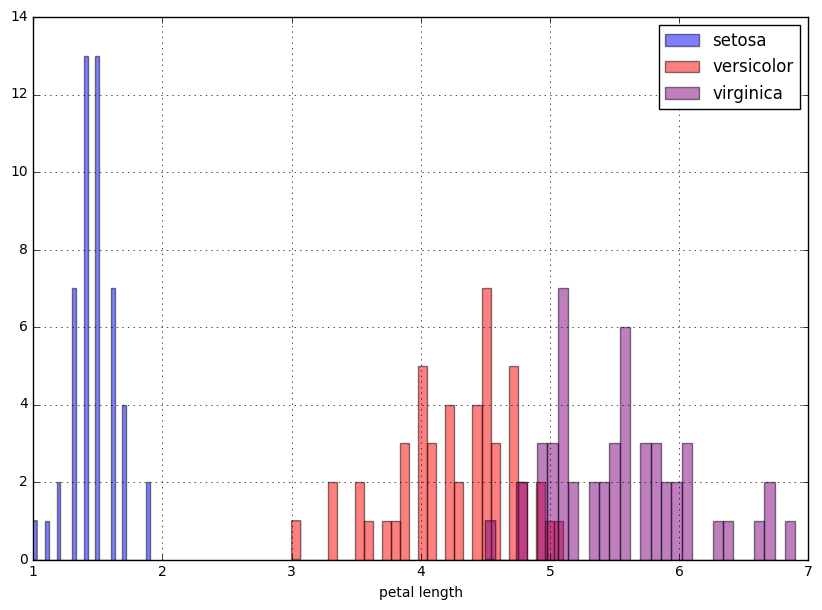

In [37]:
plt.figure(figsize=(10,7))
iris[iris['species']=='setosa']['petal_length'].hist(color='blue',alpha=0.5,bins=30,label='setosa')
iris[iris['species']=='versicolor']['petal_length'].hist(color='red',alpha=0.5,bins=30,label='versicolor')
iris[iris['species']=='virginica']['petal_length'].hist(color='purple',alpha=0.5,bins=30,label='virginica')
plt.xlabel('petal length')
plt.legend()
plt.show()

In [164]:
def converter(num):
    if num=='setosa':
        return 1
    elif num=='versicolor':
        return 2
    else:
        return 3

In [165]:
iris['num']=iris['species'].apply(converter)

In [42]:
from sklearn.cross_validation import train_test_split

In [167]:
X=iris.drop(['species','num'],1)
y=iris['num']

In [168]:
print(X.head(2))
print(y.head(2))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
0    1
1    1
Name: num, dtype: int64


In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=30)

## SVM

In [170]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.grid_search import GridSearchCV

In [171]:
params={'C':[0.1,1,10,100,1000],'gamma':[10,1,0.1,0.001,0.0001]}

In [172]:
grid=GridSearchCV(SVC(),params,verbose=3)

In [173]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] gamma=10, C=0.1 .................................................
[CV] ........................ gamma=10, C=0.1, score=0.371429 -   0.0s
[CV] gamma=10, C=0.1 .................................................
[CV] ........................ gamma=10, C=0.1, score=0.363636 -   0.0s
[CV] gamma=10, C=0.1 .................................................
[CV] ........................ gamma=10, C=0.1, score=0.375000 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.942857 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.909091 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.968750 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.2s


[CV] ........................ gamma=10, C=100, score=0.939394 -   0.0s
[CV] gamma=10, C=100 .................................................
[CV] ........................ gamma=10, C=100, score=0.812500 -   0.0s
[CV] gamma=1, C=100 ..................................................
[CV] ......................... gamma=1, C=100, score=0.914286 -   0.0s
[CV] gamma=1, C=100 ..................................................
[CV] ......................... gamma=1, C=100, score=1.000000 -   0.0s
[CV] gamma=1, C=100 ..................................................
[CV] ......................... gamma=1, C=100, score=0.937500 -   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] ....................... gamma=0.1, C=100, score=0.942857 -   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] ....................... gamma=0.1, C=100, score=1.000000 -   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [10, 1, 0.1, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [174]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [175]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
predictions=grid.predict(X_test)

In [177]:
print(confusion_matrix(predictions,y_test))
print(classification_report(predictions,y_test))

[[13  0  0]
 [ 0 16  0]
 [ 0  2 19]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       0.89      1.00      0.94        16
          3       1.00      0.90      0.95        21

avg / total       0.96      0.96      0.96        50



In [178]:
C=10
gamma=0.1
# SVC with Linear Kernel
svc=svm.SVC(kernel='linear',C=C).fit(X,y)

#Linear Kernel
lin_svc=svm.LinearSVC(C=C).fit(X,y)

#RBF Kernel - kernel='rbf',gamma
rbf_svc=svm.SVC(kernel='rbf',gamma=gamma,C=C).fit(X,y)

#Polynomial Kernel - kernel='poly', degree
poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(X,y)


In [180]:
print(accuracy_score(poly_svc.predict(X_test),y_test))
print(accuracy_score(rbf_svc.predict(X_test),y_test))
print(accuracy_score(lin_svc.predict(X_test),y_test))
print(accuracy_score(svc.predict(X_test),y_test))


0.98
0.98
0.96
0.98


In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [183]:
score=[]
for i in range(3,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    score.append(accuracy)
print(score)
    

[0.92000000000000004, 0.95999999999999996, 0.92000000000000004, 0.95999999999999996, 0.97999999999999998, 0.93999999999999995, 0.97999999999999998]


### KNN when k=7

In [184]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_pred,y_test)

0.97999999999999998

## Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
logistic=LogisticRegression()

In [187]:
logistic.fit(X_train,y_train)
accuracy_score(logistic.predict(X_test),y_test)

0.93999999999999995